In [1]:
import sys
sys.path.append("../../../")

## 数据

In [2]:
import matplotlib.pyplot as plt
from pylib.utils.functions_for_classification import mixed_2d_2cls, plot_scatter

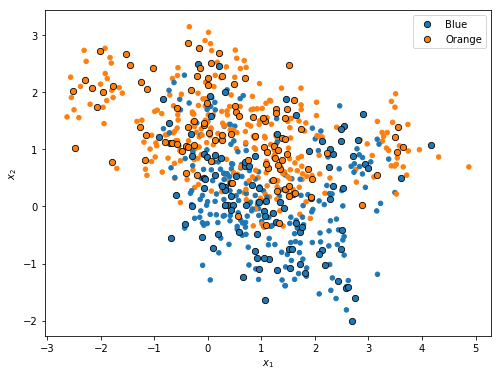

In [3]:
X_train, X_test, y_train, y_test = mixed_2d_2cls()
plt.figure(figsize=(8, 6))
plot_scatter(X_train, y_train, X_test, y_test)
plt.show()

## 硬投票

In [15]:
from pylib.utils.functions_for_classification import plot_decision_boundary
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
import numpy as np

In [5]:
lr = LogisticRegression(random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=12)
svm = SVC(C=1.0, gamma=10.0, probability=True, random_state=42)
tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=5, 
                              min_samples_leaf=4,
                              random_state=42)
base_learners = [
    ('logistic_regression', lr),
    ('naive_bayes', nb),
    ('k_neighbors', knn),
    ('svm', svm),
    ('decision_tree', tree)]

In [6]:
hard_voting = VotingClassifier(
    estimators=base_learners,
    n_jobs=-1
)
hard_voting.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic_regression',
                              LogisticRegression(random_state=42)),
                             ('naive_bayes', GaussianNB()),
                             ('k_neighbors',
                              KNeighborsClassifier(n_neighbors=12)),
                             ('svm',
                              SVC(gamma=10.0, probability=True,
                                  random_state=42)),
                             ('decision_tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=5,
                                                     min_samples_leaf=4,
                                                     random_state=42))],
                 n_jobs=-1)

In [7]:
train_err = 1 - hard_voting.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.145


In [8]:
test_err = 1 - hard_voting.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.222


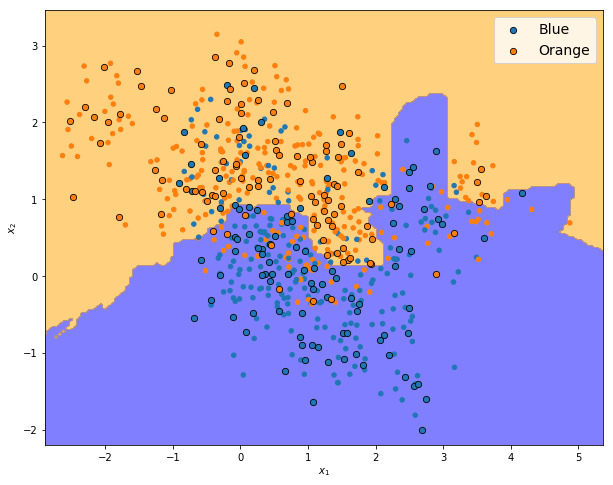

In [9]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, hard_voting)
plt.show()

### 对比单个学习器

In [13]:
model_names = []
errors = []
for name, model in base_learners:
    model.fit(X_train, y_train)
    errors.append(1 - model.score(X_test, y_test))
    model_names.append(name)

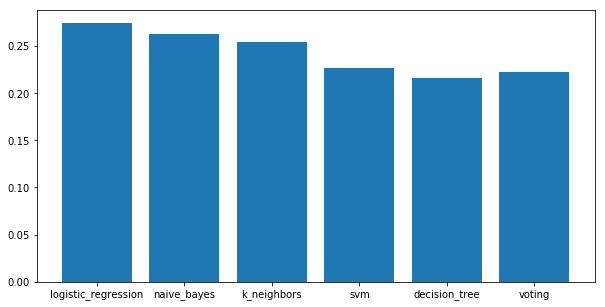

In [14]:
model_names = model_names + ["voting"]
errors = errors + [test_err]
plt.figure(figsize=(10, 5))
plt.bar(model_names, errors)
plt.show()

## 软投票

In [16]:
n_leaners = 5
weights_lst = []
for i in range(200):
    aa = np.random.uniform(size=n_leaners) 
    weight = aa / aa.sum()
    weights_lst.append(weight.tolist())
weights_lst.append([1 / n_leaners] * n_leaners)

### 寻找最优参数

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
param_grid = {
    "weights": weights_lst
}
voting_cv = GridSearchCV(
    VotingClassifier(estimators=base_learners, voting='soft'),
    param_grid,
    cv=3,
    n_jobs=-1
)
voting_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=VotingClassifier(estimators=[('logistic_regression',
                                                     LogisticRegression(random_state=42)),
                                                    ('naive_bayes',
                                                     GaussianNB()),
                                                    ('k_neighbors',
                                                     KNeighborsClassifier(n_neighbors=12)),
                                                    ('svm',
                                                     SVC(gamma=10.0,
                                                         probability=True,
                                                         random_state=42)),
                                                    ('decision_tree',
                                                     DecisionTreeClassifier(criterion='entropy',
                                                                       

In [19]:
voting_cv.best_params_

{'weights': [0.13711715740377287,
  0.0031124980427000917,
  0.44931386232208825,
  0.3159412268553657,
  0.09451525537607318]}

### 使用最优模型

In [20]:
soft_voting = voting_cv.best_estimator_

In [21]:
train_err = 1 - soft_voting.score(X_train, y_train)
print("训练样本误差：{:.3f}".format(train_err))

训练样本误差：0.125


In [22]:
test_err = 1 - soft_voting.score(X_test, y_test)
print("测试样本误差：{:.3f}".format(test_err))

测试样本误差：0.222


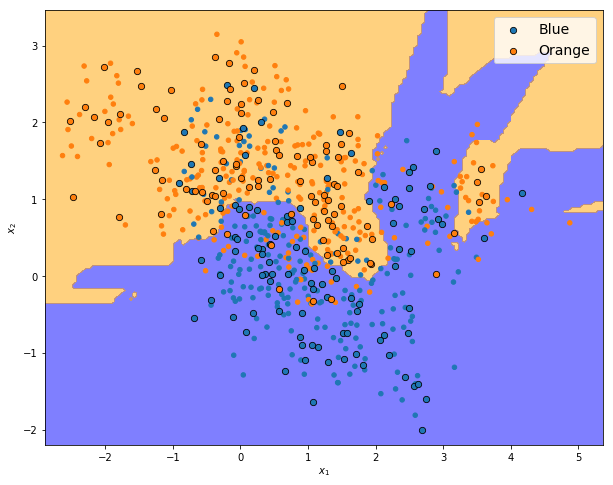

In [24]:
# 画出决策边界
plt.figure(figsize=(10, 8))
plot_decision_boundary(X_train, y_train, X_test, y_test, soft_voting)
plt.show()

### 对比单个学习器

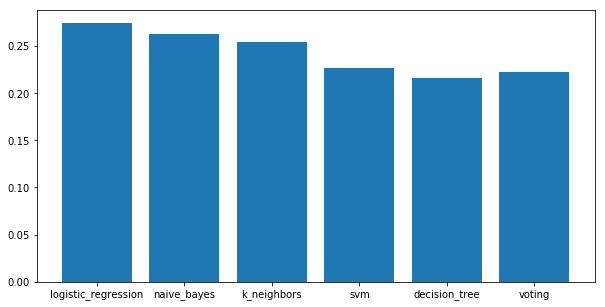

In [25]:
model_names = model_names + ["voting"]
errors = errors + [test_err]
plt.figure(figsize=(10, 5))
plt.bar(model_names, errors)
plt.show()